In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [29]:
consumo = pd.read_excel('CONSUMO.xlsx')
consumo.head()

,Fecha,Gasolina superior,Gasolina regular,Total\ngasolinas,Diesel alto azufre,Diesel bajo azufre,Diesel ultra bajo azufre,Diesel,Gas licuado de petróleo,Gasolina de aviación,...,Aceites lubricantes,Grasas lubricantes,Solventes,Naftas,Ceras,Petróleo crudo,Butano,Orimulsión,Mezclas\noleosas,Total Consumo
0,2000-01-01,308156.82,202645.20,510802.02,634667.06,0.0,0.0,634667.06,194410.476190,1426.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.750545e+06
1,2000-02-01,307766.31,205530.96,513297.27,642380.66,0.0,0.0,642380.66,174710.552381,1458.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.773220e+06
2,2000-03-01,331910.29,229499.56,561409.85,699807.25,0.0,0.0,699807.25,189234.066667,1503.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.909499e+06
3,2000-04-01,315648.08,210680.40,526328.48,586803.98,0.0,0.0,586803.98,174330.607143,1561.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.800933e+06
4,2000-05-01,319667.97,208164.34,527832.31,656948.20,0.0,0.0,656948.20,191745.147619,1642.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.941772e+06


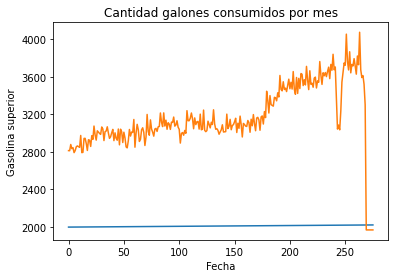

In [30]:
consumo_super = consumo[["Fecha","Gasolina superior"]]
#consumo_super.head()
plt.plot(consumo_super)
plt.gca().set(title="Cantidad galones consumidos por mes", xlabel="Fecha", ylabel="Gasolina superior")
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_2816\3390772506.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Fecha'], dtype='object')
  mediaMovil = consumo_super.rolling(window=12).mean()
C:\Users\andre\AppData\Local\Temp\ipykernel_2816\3390772506.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Fecha'], dtype='object')
  deMovil = consumo_super.rolling(window=12).std()


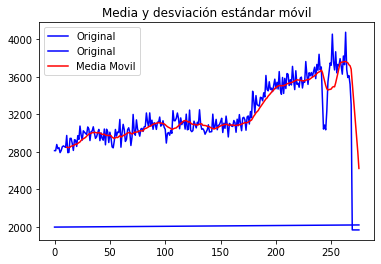

In [39]:
# Se calcula la media móvil y la desviación estandar móvil de los últimos 12 meses.
mediaMovil = consumo_super.rolling(window=12).mean()
deMovil = consumo_super.rolling(window=12).std()
# Se grafican los resultados.
original = plt.plot(consumo_super, color="blue", label="Original")
media = plt.plot(mediaMovil, color='red', label = 'Media Movil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)




In [43]:
scaler = StandardScaler()
consumo_super_scaled = scaler.fit_transform(consumo_super) 

TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.